#**Problems Chapter 6**
##**Problem 6.1**
###**Answer**
We have by sum and chain rules:
\begin{align}
  \frac{\partial L}{\partial \phi_0} = \sum_{i=1}^{I} 2 (\phi_0 + \phi_1 x_i - y_i) \tag{1}\\
  \frac{\partial L}{\partial \phi_1} = \sum_{i=1}^{I} 2 (\phi_0 + \phi_1 x_i - y_i)x_i \tag{2}
\end{align}

##**Problem 6.2**
###**Answer 1**
\begin{align}
\mathbf{H}[\mathbf{ϕ}] =
\begin{bmatrix}
2 & 2x_i \\
2x_i & 2x_i^2
\end{bmatrix}
\end{align}
###**Answer 2**
Let's prove that the least squares loss function is convex, showing that the eigenvalues of the preceding Hessian matrix are always positive. An eigenvalue of $\mathbf{H}$ matrix is a scalar $\lambda$ where $H \mathbf{x} = \lambda \mathbf{x}$. Let's find the eigenvalues of $\mathbf{H}$:
\begin{align}
H \mathbf{x} = \lambda \mathbf{x}\\
(H-I\lambda)\mathbf{x} = \mathbf{0}\\
\end{align}
Since $\mathbf{x}\neq \mathbf{0}$ then $0=\det(H-I\lambda)=(2-\lambda)(2x_i^2-\lambda) - 4x_i^2 = \lambda - 2x^2_i -2$, therefore $\lambda = 2x_i^2 +2 >0$.
##**Problem 6.2**
###**Answer**
Using Mathematica we obtain the second and third outputs in image below as the partial derivatives of $f$ with respect to $\phi_0$ and $\phi_1$, respectively:
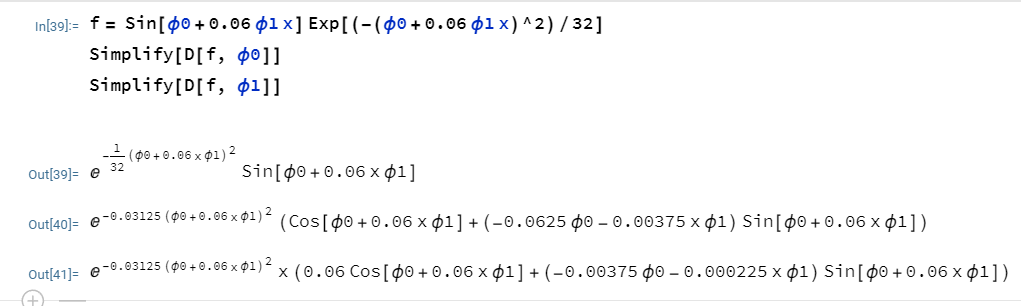

##**Problem 6.2**
###**Answer (i)**
In the graph below we can observe that:
* if the parameter $\phi_1$ is positive: as we increase it then function will be "positively" steeper. And if we increase the parameter $\phi_0$ the function shifts left, if we decrease it it shifts right.
* if the parameter $\phi_1$ is negative: as we decrease it then function will be "negatively" steeper. And if we increase the parameter $\phi_0$ the function shifts right, if we decrease it it shifts left.

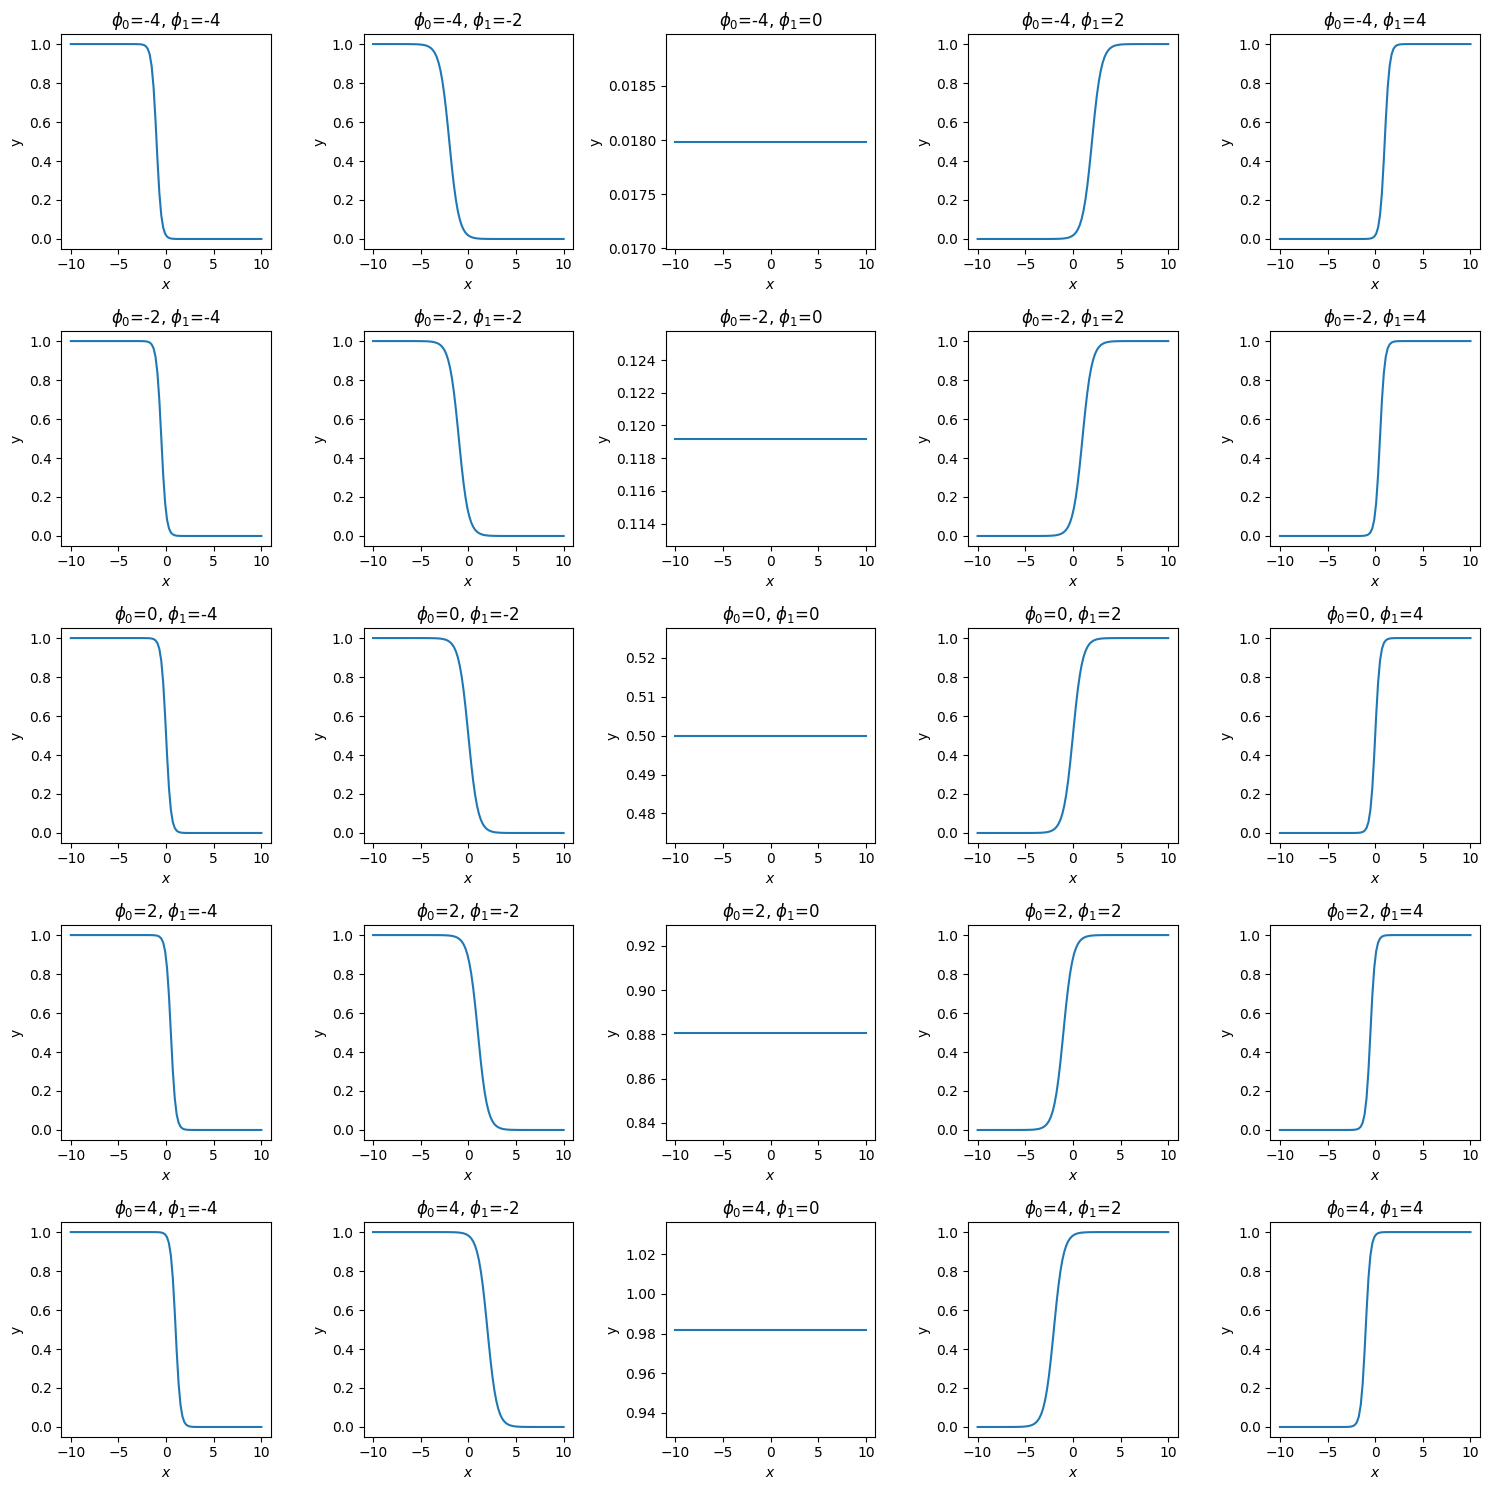

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir una matriz para los valores de a y b
phi_0_values = [-4,-2, 0, 2, 4]
phi_1_values = [-4,-2, 0, 2, 4]

# Definir la matriz de gráficas
fig, axs = plt.subplots(5, 5, figsize=(15, 15))

# Iterar sobre las filas y columnas para generar las gráficas
for i, phi_0 in enumerate(phi_0_values):
    for j, phi_1 in enumerate(phi_1_values):
        x = np.linspace(-10, 10, 100)
        y = 1/(1+np.exp(-phi_0 - phi_1 * x))
        axs[i, j].plot(x, y)
        axs[i, j].set_title(f'$\phi_0$={phi_0}, $\phi_1$={phi_1}')
        axs[i, j].set_xlabel('$x$')
        axs[i, j].set_ylabel('y')

# Ajustar el diseño y mostrar las gráficas
plt.tight_layout()
plt.show()


###**Answer 2**
If we define the probability distribution:
\begin{align}
Pr(y|\mathbf{ϕ},x) = (1-sig[ϕ_0 + ϕ_1 x])^{(1-y)} \cdot sig[ϕ_0 + ϕ_1 x]^y
\end{align}
We obtain the loss function:
\begin{align}
L[\mathbf{ϕ}]  = - \sum_{i=1}^L \log\left[Pr(y_i|\mathbf{ϕ},x_i)\right] = - \sum_{i=1}^L (1-y_i) \log\left[ \cdot (1-sig[ϕ_0 + ϕ_1 x_i])\right] + y_i \log\left[sig[ϕ_0 + ϕ_1 x_i]\right]
\end{align}

###**Answer 3**
Since the derivative of $sig[z]$ is $\frac{\exp[-z]}{(1+\exp[-z])^2}$, then the partial derivates of the loss function are:
\begin{align}
\frac{\partial L}{\partial \phi_0} = -\sum_{i=1}^L \frac{\exp[-ϕ_0 - ϕ_1 x_i]}{(1+\exp[-ϕ_0 - ϕ_1 x_i])^2}\left( \frac{y_i}{sig[ϕ_0 + ϕ_1 x_i]} - \frac{1-y_i}{1-sig[ϕ_0 + ϕ_1 x_i]} \right)\\
\frac{\partial L}{\partial \phi_1} = -\sum_{i=1}^L \frac{x_i \cdot \exp[-ϕ_0 - ϕ_1 x_i]}{(1+\exp[-ϕ_0 - ϕ_1 x_i])^2}\left( \frac{y_i}{sig[ϕ_0 + ϕ_1 x_i]} - \frac{1-y_i}{1-sig[ϕ_0 + ϕ_1 x_i]} \right)
\end{align}
###**Answer 4**
The loss function is convex, and we can prove it with the Hessian Matrix, as we did before.

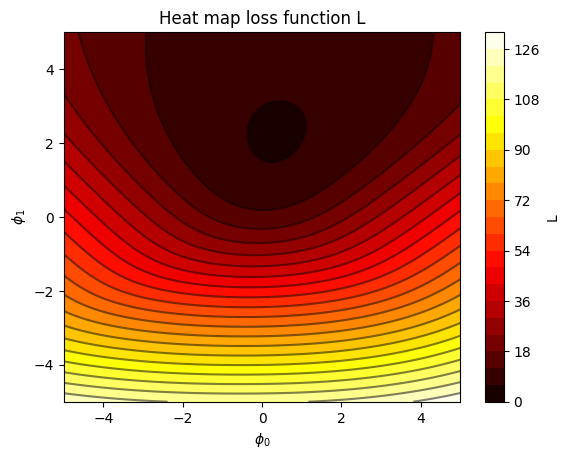

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#random data (normal distribution)
x_0 = np.random.normal(loc=-1, scale=1, size=10)
x_1 = np.random.normal(loc=1, scale=1, size=10)

#define functions
def sig(z):
  return 1/(1+np.exp(-z))
def loss(phi_0,phi_1,x,y):
  return -(1-y) * np.log(1-sig(phi_0 + phi_1 * x)) - y*np.log(sig(phi_0 + phi_1 * x))
def loss_function(phi_0,phi_1):
  total_loss = 0;
  for x in x_0:
    total_loss += loss(phi_0,phi_1,x,0)
  for x in x_1:
    total_loss += loss(phi_0,phi_1,x,1)
  return total_loss

# Definir el rango de valores para x e y
phi_0 = np.linspace(-5, 5, 100)
phi_1 = np.linspace(-5, 5, 100)

# Generar una cuadrícula de puntos para evaluar la función
PHI_0, PHI_1 = np.meshgrid(phi_0, phi_1)

# Evaluar la función en cada punto de la cuadrícula
L = loss_function(PHI_0, PHI_1)

# Graficar el mapa de calor con curvas de nivel
plt.contourf(PHI_0, PHI_1, L, 20, cmap='hot')  # Mapa de calor
plt.colorbar(label='L')  # Agregar una barra de color con etiqueta
plt.contour(PHI_0, PHI_1, L, 20, colors='black', linestyles='solid', alpha=0.5)  # Curvas de nivel
plt.xlabel('$\phi_0$')
plt.ylabel('$\phi_1$')
plt.title('Heat map loss function L')
plt.grid(False)
plt.show()

##**Problem 6.5**
###**Answer**
\begin{align}
\frac{\partial L}{\partial \phi_0} = -\sum_{i=1}^L 2(y - f[x,\mathbf{ϕ}])\\
\end{align}
For $i=1,2,3$:
\begin{align}
\frac{\partial L}{\partial \phi_i} = -\sum_{i=1}^L 2(y - f[x,\mathbf{ϕ}]) \cdot a[\theta_{i0} + \theta_{i1}x]\\
\frac{\partial L}{\partial \theta_{i0}} = -\sum_{i=1}^L 2(y - f[x,\mathbf{ϕ}])\cdot \mathbb{I}[\theta_{i0} + \theta_{i1}x]\\
\frac{\partial L}{\partial \theta_{i0}} = -\sum_{i=1}^L 2(y - f[x,\mathbf{ϕ}])\cdot \mathbb{I}[\theta_{i0} + \theta_{i1}x] \cdot x
\end{align}
##**Problem 6.6**
###**Answer**
The function b) is the only convex function. This is because if we draw a straight line segment between any pair of points on the function, all the points on the function lying between those selected points, are below or on the line segment we just draw. This property doesn't hold true for functions a) and c)
The local minumum points are 1 and 3. The global minimum points are 2, 5 and 6. The saddle point is 7. Point 4 is neither a global, local nor saddle point.
##**Problem 6.7**
###**Answer**
The algorithm used for this gradient descent employs, for each step, a line search routine that provides us with the learning rate associated with the minimal loss in the direction of the gradient. Therefore, if we aim to decrease the loss from this new parameter point determined by the learning rate and the gradient descent, we need to shift in a perpendicular direction. This is because moving further or moving back in the gradient direction leads us to a bigger loss. We can avoid this perpendicular direction for each new step by using momentum.
##**Problem 6.8**
###**Answer**
It can happen, although depending on the learning rate, the itinerary for it, and the nature of the loss function
##**Problem 6.9**
###**Answer**
Each iteration of the gradient descent algorithm uses a batch of data size of 20. The entire data has a size of 100, then with 5 iterations we complete 1 epoch. Therefore, with 1000 iterations we will complete 200 epochs.
##**Problem 6.10**
###**Answer**
\begin{align}
\mathbf{m}_t &= β \cdot \mathbf{m}_{t-1} + (1-β) \sum_{i \in \mathcal{B}_{t-1}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1}]}{\partial \mathbf{ϕ} }\\
&= β \cdot \left( β \cdot \mathbf{m}_{t-2} + (1-β) \sum_{i \in \mathcal{B}_{t-2}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-2}]}{\partial \mathbf{ϕ} } \right) + (1-β) \sum_{i \in \mathcal{B}_{t-1}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1}]}{\partial \mathbf{ϕ} }\\
&= β^2 \cdot \mathbf{m}_{t-2} + β(1-β) \sum_{i \in \mathcal{B}_{t-2}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-2}]}{\partial \mathbf{ϕ} } + (1-β) \sum_{i \in \mathcal{B}_{t-1}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1}]}{\partial \mathbf{ϕ} }\\
&= β^2 \cdot \left( β \cdot \mathbf{m}_{t-3} + (1-β) \sum_{i \in \mathcal{B}_{t-3}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-3}]}{\partial \mathbf{ϕ} } \right) + β(1-β) \sum_{i \in \mathcal{B}_{t-2}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-2}]}{\partial \mathbf{ϕ} } + (1-β) \sum_{i \in \mathcal{B}_{t-1}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1}]}{\partial \mathbf{ϕ} }\\
&= β^3 \cdot \mathbf{m}_{t-3} + β^2(1-β) \sum_{i \in \mathcal{B}_{t-3}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-3}]}{\partial \mathbf{ϕ} } + β(1-β) \sum_{i \in \mathcal{B}_{t-2}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-2}]}{\partial \mathbf{ϕ} } + (1-β) \sum_{i \in \mathcal{B}_{t-1}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1}]}{\partial \mathbf{ϕ} }\\
&.\\
&.\\
&.\\
  &= \sum_{n=0}^∞ (1-β)β^n \sum_{i \in \mathcal{B}_{t-1-n}} \frac{\partial \ell_i[\mathbf{ϕ}_{t-1-n}]}{\partial \mathbf{ϕ} }
\end{align}
##**Problem 6.11**
###**Answer**
If our model has 1,000,000 parameters, then the Hessian matrix of the loss function of this model will have a size of 1,000,000*1,000,000.

